# Algoritma K-Nearest Neigbors

1. Menentukan parameter K sebagai banyaknya jumlah tetangga terdekat dengan objek baru.
2. Menghitung jarak antar objek/data baru terhadap semua objek/data yang telah di training.
3. Urutkan hasil perhitungan tersebut.
4. Tentukan tetangga terdekat berdasarkan jarak minimum ke K.
5. Tentukan kategori dari tetangga terdekat dengan objek/data.
6. Gunakan kategori mayoritas sebagai klasifikasi objek/data baru.

# 1. Menentukan K-Fold

In [ ]:
K = 3

# 2.  Menghitung Jarak

# Minkowsky Distance

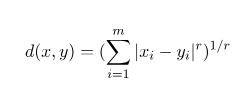

In [1]:
def get_minkowski_distance(X,Y,p=2):
    jumlah = sum(pow(abs(x-y),p) for x,y in zip(X, Y))
    return jumlah ** (1/p)

In [12]:
get_minkowski_distance([0,3,4,5],[7,6,3,-1],p=3)

8.372966759705923

# Euclidean Distance

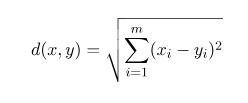

In [2]:
from math import sqrt

def get_euclidean_distance(X,Y):
    return sqrt(sum(pow(x-y,2) for x,y in zip(X,Y)))

In [9]:
get_euclidean_distance([0,3,4,5],[7,6,3,-1])

4.123105625617661

# Manhattan Distance

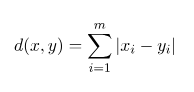

In [3]:
from math import fabs

def get_manhattan_distance(X,Y):
    return sqrt(sum(fabs(x-y) for x,y in zip(X,Y)))

In [8]:
get_manhattan_distance([0,3,4,5],[7,6,3,-1])

4.123105625617661

# Data Training

In [5]:
import pandas as pd

data_train = pd.read_csv('train.csv')

X_train = []
Y_train = []

for index,value in data_train.iterrows():
    X_train.append([ value['R'],value['G'], value['B']])
    Y_train.append(value['Gambar'])

# Data Testing

In [6]:
data_test = pd.read_csv('test.csv')

X_test = []
Y_test = []

for index,value in data_test.iterrows():
    X_test.append([ value['R'],value['G'], value['B']])
    Y_test.append(value['Gambar'])

# Training Model

In [46]:
# def train(X_train,Y_train,X_test,Y_test):
X_test = [[45.17164611816406, 42.88371276855469, 34.196792602539055],
 [36.89564514160156, 34.071929931640625, 26.27308654785156],
 [61.18663024902344, 56.822509765625, 40.34938049316406],
 [37.46755981445313, 37.30403137207031, 27.427001953125],
 [52.48924255371094, 43.32394409179688, 27.74835205078125]]

Y_test = [1.0, 1.0, 1.0, 1.0, 1.0]

nama = []
R = []
G = []
B = []
jarak = []
hasil = []

dict_jarak = {}

for x_test,y_test in zip(X_test,Y_test):
    data = []
    for x_train,y_train in zip(X_train,Y_train):
        data.append([get_minkowski_distance(x_train,x_test),y_train])

#     dict_jarak.update({str(y_test):data})
    df = pd.DataFrame(data, columns = ['jarak', 'label'])
    df = df.sort_values(by=['jarak'])
#     df.to_csv(str(y_test)+'.csv')
#     print(df.head(3))
    df = df.head(3)
    hasil.append(df.groupby(["label"]).count().sort_values(by=['jarak']).tail(1).index.get_level_values('label')[0])
    

In [47]:
hasil

[1.0, 3.0, 1.0, 3.0, 1.0]

In [48]:
set(Y_test) & set(hasil)

{1.0}

In [53]:
set(Y_test).intersection(hasil)

{1.0}

In [57]:
jumlah = 0
jum = [(jumlah + 1) for a,b in zip(Y_test,hasil) if a == b]
len(jum)

3

In [61]:
len(jum)/len(Y_test)

0.6

In [ ]:
count()